In [4]:
import numpy as np
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [68]:
df = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/terrenos-valor-oferta/Terrenos-en-venta-2020.csv", encoding = "latin1", sep=",")

Hacer un primer análisis del dataset y analizar nulos.

In [7]:
df.head()

,DIRECCION,PROPIEDADS,PRECIOUSD,PRECIOPESO,DOLARM2,PESOSM2,COTIZACION,TRIMESTRE_,BARRIO,COMUNA_
0,RIVADAVIA 3500,190,150000,12000000,790,63158,80,CUARTO,ALMAGRO,5
1,PRINGLES 100,242,230000,18400000,950,76033,80,CUARTO,ALMAGRO,5
2,"PERON, JUAN DOMINGO, TTE. 3400",211,265000,21200000,1256,100474,80,CUARTO,ALMAGRO,5
3,MEXICO 4000,320,300000,24000000,938,75000,80,CUARTO,ALMAGRO,5
4,VENEZUELA 4067,250,305000,24400000,1220,97600,80,CUARTO,ALMAGRO,5


In [8]:
df.isna().sum()

,0
DIRECCION,6
PROPIEDADS,0
PRECIOUSD,0
PRECIOPESO,0
DOLARM2,0
PESOSM2,0
COTIZACION,0
TRIMESTRE_,0
BARRIO,0
COMUNA_,0


### Ejercicio 1.
¿Cuál es el precio medio del metro cuadrado en la Ciudad de Buenos Aires?

In [12]:
f"{df.DOLARM2.mean():.2f}"

'2357.65'

### Ejercicio 2.
a) Dividir las propiedades por cuartiles de precios en dólares.

In [16]:
cuartiles = pd.qcut(df['PRECIOUSD'], q=4, labels=["Q1", "Q2", "Q3", "Q4"])

# Añadir los cuartiles al DataFrame como una nueva columna
df['price_quartile'] = cuartiles

# Visualizar el DataFrame con la nueva columna
print(df[['PRECIOUSD', 'price_quartile']].sort_values(by="PRECIOUSD"))

      PRECIOUSD price_quartile
8037      68000             Q1
2658      68000             Q1
5365      68000             Q1
1022      68000             Q1
231       68000             Q1
...         ...            ...
2644   14095998             Q4
5357   14095998             Q4
8042   14095998             Q4
229    14095998             Q4
218    16000000             Q4

[10301 rows x 2 columns]



b) ¿Cuáles son los barrios con más domicilios en venta dentro del cuartil más barato de CABA?

Usar pivot_table

In [23]:
df_q1 = df[df['price_quartile'] == "Q1"]
pivot = pd.pivot_table(df_q1, values="DIRECCION", index='BARRIO', aggfunc='count')
pivot.sort_values(by="DIRECCION", ascending=False)

,DIRECCION
BARRIO,
MATADEROS,171
PARQUE PATRICIOS,119
NUEVA POMPEYA,114
SAN CRISTOBAL,104
BOCA,104
LINIERS,99
PARQUE AVELLANEDA,97
VELEZ SARSFIELD,96
VILLA URQUIZA,92


¿Y usando groupby?

In [33]:
df.query("price_quartile == 'Q1'").groupby("BARRIO")["DIRECCION"].count().sort_values(ascending=False)

,DIRECCION
BARRIO,
MATADEROS,171
PARQUE PATRICIOS,119
NUEVA POMPEYA,114
SAN CRISTOBAL,104
BOCA,104
LINIERS,99
PARQUE AVELLANEDA,97
VELEZ SARSFIELD,96
VILLA URQUIZA,92


¿Hay otra forma más sencilla?

In [35]:
df.query("price_quartile == 'Q1'")["BARRIO"].value_counts()


,count
BARRIO,
MATADEROS,171
PARQUE PATRICIOS,120
NUEVA POMPEYA,114
BOCA,104
SAN CRISTOBAL,104
LINIERS,99
PARQUE AVELLANEDA,97
VELEZ SARSFIELD,96
VILLA URQUIZA,92


### Ejercicio 3.

¿Cuál sería el precio promedio de las propiedades para cada decil, según metros cuadrados?

In [42]:
df["deciles"] = pd.qcut(df['DOLARM2'], q=10,labels = [f"D{str(i+1).zfill(2)}" for i in range(10)])
df.groupby("deciles")["PRECIOUSD"].mean()

<ipython-input-42-f17bee4df9f4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("deciles")["PRECIOUSD"].mean()


,PRECIOUSD
deciles,
D01,593256.01746
D02,567162.96172
D03,485539.76378
D04,620905.04956
D05,731154.31620
D06,723822.51208
D07,1043131.51751
D08,1021848.54078
D09,1269701.54678


In [43]:
df.groupby("deciles", observed=False)["PRECIOUSD"].mean()

,PRECIOUSD
deciles,
D01,593256.01746
D02,567162.96172
D03,485539.76378
D04,620905.04956
D05,731154.31620
D06,723822.51208
D07,1043131.51751
D08,1021848.54078
D09,1269701.54678


### Ejercicio 4.

¿Cuáles son los barrios más caros en términos de precios por metro cuadrado? ¿Y los más baratos?


<ipython-input-52-6d8ee25a1842>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DOLARM2', y=pivot_table.index, data=pivot_table, palette='viridis')
<ipython-input-52-6d8ee25a1842>:10: UserWarning: Glyph 145 (\x91) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


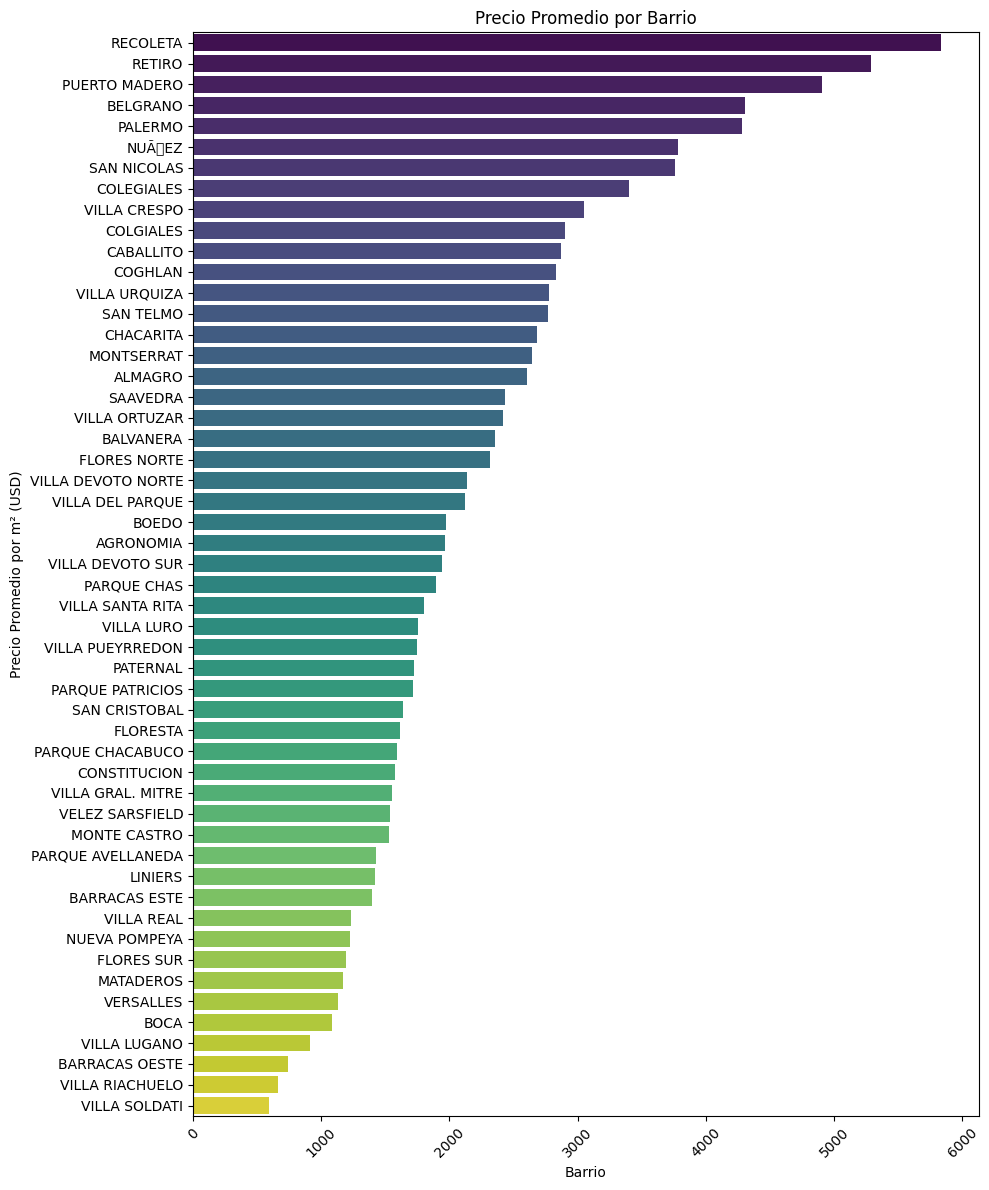

In [52]:
pivot_table = df.pivot_table(index="BARRIO", values="DOLARM2", aggfunc="mean").sort_values(by="DOLARM2", ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 12))
sns.barplot(x='DOLARM2', y=pivot_table.index, data=pivot_table, palette='viridis')
plt.title('Precio Promedio por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Precio Promedio por m² (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-53-7a4fd90abc47>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='DOLARM2', y='BARRIO', data=pivot_table, palette='viridis')
<ipython-input-53-7a4fd90abc47>:13: UserWarning: Glyph 145 (\x91) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


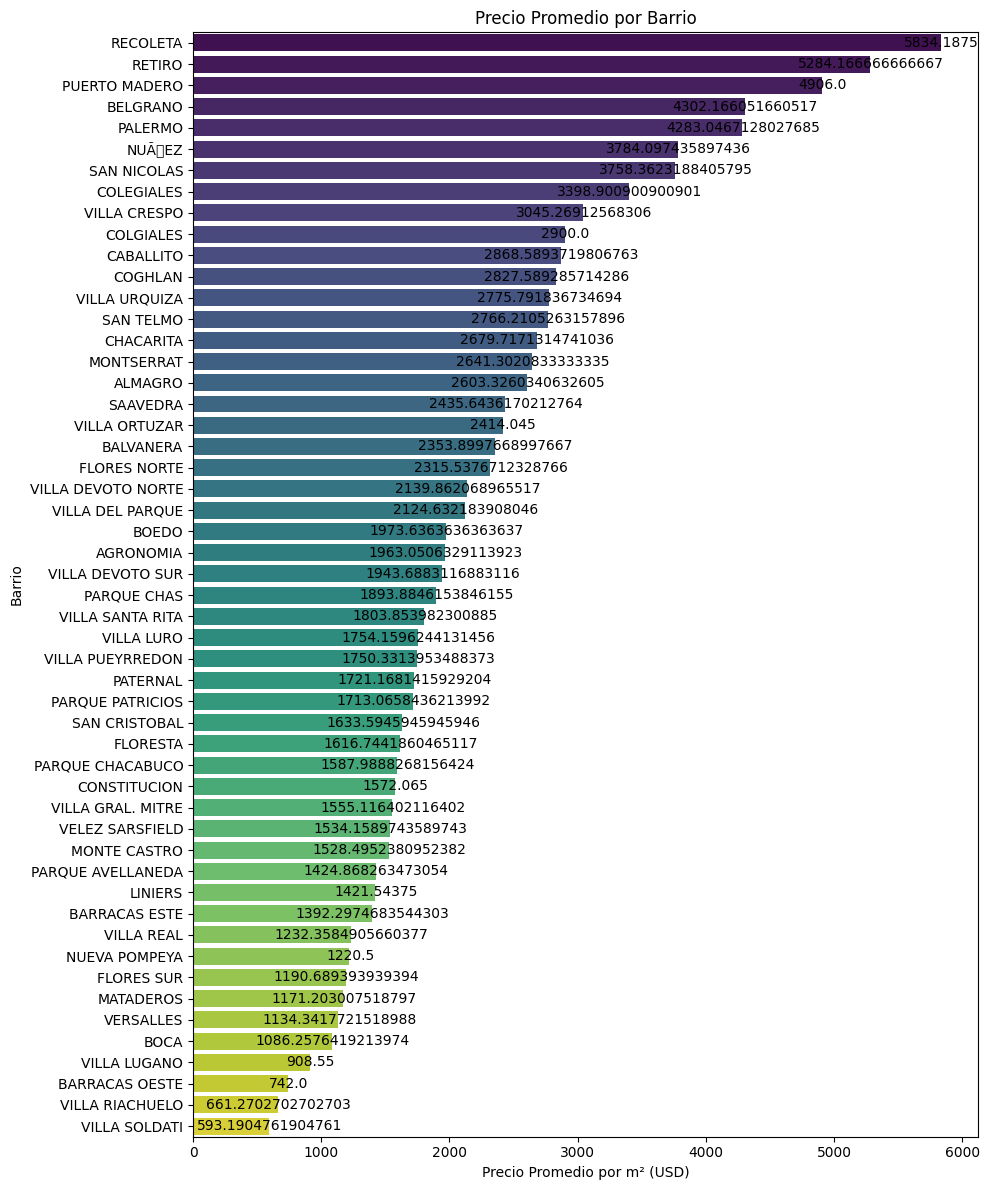

In [53]:
plt.figure(figsize=(10, 12))
ax = sns.barplot(x='DOLARM2', y='BARRIO', data=pivot_table, palette='viridis')

# Añadir valores en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 5, p.get_y() + p.get_height()/2),
                ha='center', va='center', fontsize=10, color='black')

plt.title('Precio Promedio por Barrio')
plt.xlabel('Precio Promedio por m² (USD)')
plt.ylabel('Barrio')
plt.tight_layout()
plt.show()

### Ejercicio 5

Dado el siguiente DataFrame con departamentos en venta en CABA en 2019: https://data.buenosaires.gob.ar/dataset/terrenos-valor-oferta/resource/c9a6fed8-da1d-460e-92a8-e0213d68f59c

¿Qué porcentaje de propiedades que estaban en venta durante 2019 siguieron estando en 2020?

In [69]:
df2019 = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/terrenos-valor-oferta/Terrenos-en-venta-2020.csv", encoding = "latin1", sep=",")
df2019

,DIRECCION,PROPIEDADS,PRECIOUSD,PRECIOPESO,DOLARM2,PESOSM2,COTIZACION,TRIMESTRE_,BARRIO,COMUNA_
0,RIVADAVIA 3500,190,150000,12000000,790,63158,80,CUARTO,ALMAGRO,5
1,PRINGLES 100,242,230000,18400000,950,76033,80,CUARTO,ALMAGRO,5
2,"PERON, JUAN DOMINGO, TTE. 3400",211,265000,21200000,1256,100474,80,CUARTO,ALMAGRO,5
3,MEXICO 4000,320,300000,24000000,938,75000,80,CUARTO,ALMAGRO,5
4,VENEZUELA 4067,250,305000,24400000,1220,97600,80,CUARTO,ALMAGRO,5
...,...,...,...,...,...,...,...,...,...,...
10296,"BONORINO, ESTEBAN, Cnel. 300",149,430000,27412500,2886,183976,64,PRIMER,FLORES NORTE,7
10297,RIVERA INDARTE 100,500,790000,50362500,1580,100725,64,PRIMER,FLORES NORTE,7
10298,"ALVAREZ, DONATO, Tte. Gral. 200",771,690000,43987500,895,57052,64,PRIMER,FLORES NORTE,7
10299,"ALBERDI, JUAN BAUTISTA 3100",409,800000,51000000,1956,124694,64,PRIMER,FLORES NORTE,7


In [78]:
df.drop_duplicates(subset="DIRECCION", inplace=True)
df2019.drop_duplicates(subset="DIRECCION", inplace=True)

In [79]:
intersection = pd.merge(df, df2019, on='DIRECCION', how='inner', suffixes=('_2020', '_2019'))

print(intersection.shape[0])

3825
